In [1]:
# import tensorflow as tf
# print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
# tf.debugging.set_log_device_placement(True)

In [2]:
# Importing the libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
# !unrar x /content/Soil_Dataset.rar

In [4]:
#data sugmentation
# Preprocessing the Training set
train_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')
training_set = train_datagen.flow_from_directory('Soil_Dataset/Train',
                                                 target_size = (150,150),
                                                 batch_size = 32,
                                                class_mode="categorical")

Found 715 images belonging to 4 classes.


In [5]:
training_set.class_indices

{'Alluvial_Soil': 0, 'Black_Soil': 1, 'Clay_Soil': 2, 'Red_Soil': 3}

In [6]:
# Preprocessing the Test set
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('Soil_Dataset/Test',
                                            target_size = (150,150),
                                            batch_size = 32,
                                            class_mode="categorical")

Found 188 images belonging to 4 classes.


In [7]:
import matplotlib.pyplot as plt
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

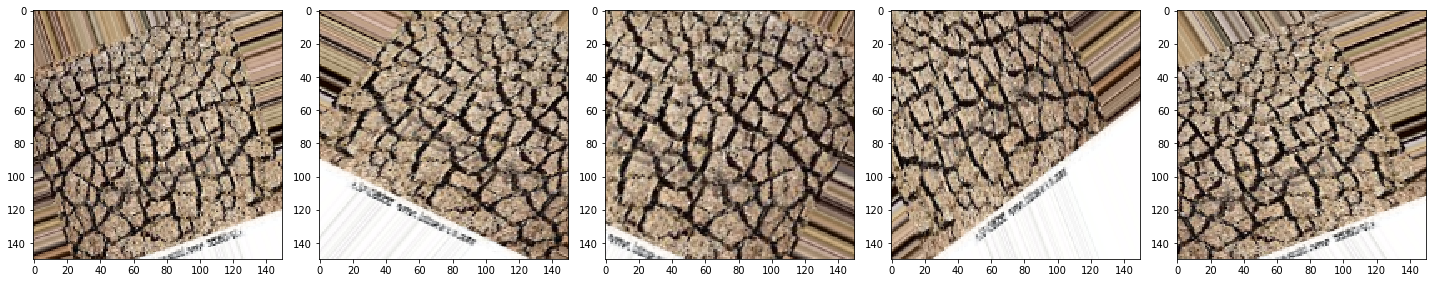

In [8]:
images = [training_set[0][0][0] for i in range(5)]
plotImages(images)

<center><b style="font-size:35px"> Using CNN</b></center>

In [9]:
from tensorflow.keras.layers import Conv2D

In [10]:
# Part 2 - Building the CNN

# Initialising the CNN
cnn = tf.keras.models.Sequential()

# Step 1 - # Adding a first convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3, activation='relu', input_shape=[150,150, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

tf.keras.layers.Dropout(0.5)
# Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
tf.keras.layers.Dropout(0.5)

# Step 5 - Output Layer
cnn.add(tf.keras.layers.Dense(4, activation="softmax"))

In [11]:
# Part 3 - Training the CNN

# Compiling the CNN
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [12]:
# Training the CNN on the Training set and evaluating it on the Test set
history = cnn.fit(x = training_set, validation_data = test_set, epochs = 2)

Epoch 1/2
23/23 [==============================] - 33s 1s/step - loss: 1.4871 - accuracy: 0.4656 - val_loss: 0.5501 - val_accuracy: 0.7606
Epoch 2/2
23/23 [==============================] - 26s 1s/step - loss: 0.4419 - accuracy: 0.8270 - val_loss: 0.4856 - val_accuracy: 0.7819


## Save Model

In [49]:
#save model
from tensorflow.keras.models import load_model
cnn.save('soil_cnn.h5')

In [50]:
# load model
model = load_model('soil_cnn.h5')

## User Prediction

In [94]:
# Part 4 - Making a single prediction

import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('4.png', target_size = (150,150))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
result = np.argmax(result)
soil_type = round(result)

In [95]:
soil_type

3

In [96]:
if soil_type==0:
  print('This Is Alluvial_Soil')
elif soil_type ==1:
  print('This is Black Soil')
elif soil_type == 2:
  print('This is Clay Soil')
else:
  print('This is Red Soil')

This is Red Soil


<center>--------------------------------------------------------------------------</center>